In [171]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy
import re
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from scipy.stats import norm

In [172]:
##### folder name
uni = "energy_e_1_256_8_256_7_100_20250116"  

##### load prediction result
path = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]
df = pd.read_csv(pred_list[0])


##### load energy label
path_name = "/home/chyoo/work/KNO_reconstruction/KNO_reconstruction/result_*/"+uni +"/name_"+uni +".csv"
pred_path_name = glob.glob(path_name)
pred_list_name = [file for file in pred_path_name if file.endswith(".csv")]
df2 = pd.read_csv(pred_list_name[0])

In [173]:
pred = np.array(df['prediction']).reshape(-1,1)*100
label = np.array(df['label']).reshape(-1,1)*100
fname = np.array(df2['fname']).reshape(-1,1)


In [174]:
#### extract energy label
pattern = re.compile(r'(\d+)MeV')
fnames = []
for row in fname:
    name = row[0] if isinstance(row, (list, np.ndarray)) else row
    match = pattern.search(name)
    if match:
        fnames.append(match.group(1))  
fnames = np.array(fnames, dtype=int)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


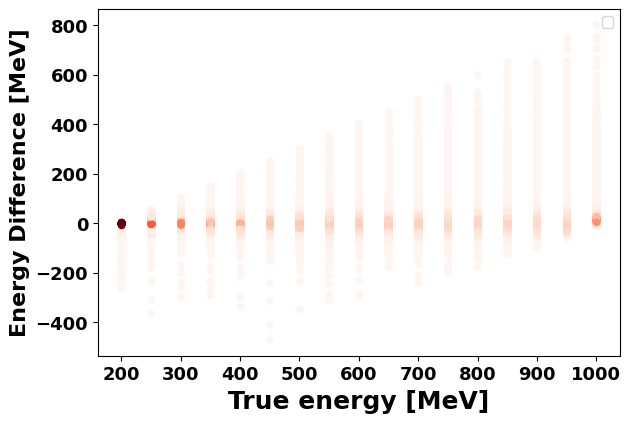

In [175]:
dpi=100
fig_size = (6, 4)

plt.figure(figsize=fig_size,dpi=dpi)


x_edges = np.linspace(min(label.reshape(-1)), max(label.reshape(-1)) + 1e-6, 100)
y_edges = np.linspace(min(label.reshape(-1)-pred.reshape(-1)), max(label.reshape(-1)-pred.reshape(-1)) + 1e-6, 100)
# Calculating bin density
bin_counts, _, _ = np.histogram2d(label.reshape(-1), label.reshape(-1)-pred.reshape(-1)  , bins=[x_edges, y_edges])

# Recalculating the indices for binning
x_bin = np.digitize(label.reshape(-1), x_edges) - 1
y_bin = np.digitize(label.reshape(-1)-pred.reshape(-1), y_edges) - 1

# Ensuring indices are within valid range
x_bin = np.clip(x_bin, 0, bin_counts.shape[0] - 1)
y_bin = np.clip(y_bin, 0, bin_counts.shape[1] - 1)

density = bin_counts[x_bin, y_bin]

plt.scatter(label.reshape(-1), label.reshape(-1)-pred.reshape(-1), c=density, s=20, cmap='Reds')
# plt.colorbar(label='Density')
# plt.plot([200, 1200], [200, 1200], color='red', linestyle='--', label='y = x')


plt.tight_layout()

plt.xticks(fontsize = 13, fontweight='bold')
plt.yticks(fontsize = 13, fontweight='bold')
plt.xlabel('True energy [MeV]', fontweight='bold',fontsize = 18)
plt.ylabel('Energy Difference [MeV]', fontweight='bold',fontsize = 16)
plt.legend()
# plt.savefig("energy_density.png", dpi=dpi, bbox_inches="tight")



plt.show()

In [176]:
# mu_gaussian_1 = []
# std_gaussian_1 = []
# for energy in range(200,1050,50):
#     count, bins, ignored = plt.hist(100*(label[np.array(fnames)==energy]-pred[np.array(fnames)==energy])/label[np.array(fnames)==energy], bins=100, density=True, alpha=0.6, color='r', histtype = 'step')

#     # 가우시안 분포 피팅
#     mu, std = norm.fit(100*(label[np.array(fnames)==energy]-pred[np.array(fnames)==energy])/label[np.array(fnames)==energy])

#     # 피팅된 가우시안 분포 그리기
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 50)
#     p = norm.pdf(x, mu, std)

#     plt.plot(x, p, 'k', linewidth=2)
#     title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#     mu_gaussian_1.append(mu)
#     std_gaussian_1.append(std)
#     plt.title(title)
#     # plt.show()
#     plt.close()

In [177]:
# def gaussian(x, A, mu, sigma):
#     f = A*np.exp(-x-mu)**2/2./sigma**2
#     return f

# ran = 100
# bins = 100
# pp = [10000,20,1]
# # pp = None


# energys_2 = []
# mu_2 = []
# std_2 = []

# for energy in range(200,1050,50):

#     tmp_hist = plt.hist(100*(label[np.array(fnames)==energy]-pred[np.array(fnames)==energy])/label[np.array(fnames)==energy],bins = bins, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
#     hist_N = tmp_hist[0]
#     hist_x = []
#     for i in range(len(tmp_hist[1])-1):
#         tmp = tmp_hist[1]
#         hist_x.append((tmp[i] + tmp[i+1])/2.)
#     hist_x = np.array(hist_x)
#     popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=pp, sigma=1./np.sqrt(hist_N), absolute_sigma=True, maxfev=2000)
#     hist_xx = np.arange(-ran,ran,0.6/bins)
#     A = popt[0]; mu = popt[1]; sigma = popt[2]

#     # plt.title('DL  ' + r'$\Delta$'+vertexs[vertex],fontsize = 15)
#     # plt.xticks(fontsize = 10)
#     # plt.yticks(fontsize = 10)
#     # plt.xlabel("??", fontsize=10, loc='right')

#     plt.text(50,0.001,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
#     plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

        
#     energys_2.append(energy)
#     mu_2.append(popt[1])
#     std_2.append(np.abs(popt[2]))


#     title = str(energy)+"MeV"+"  Fit results: mu = %.2f,  std = %.2f" % (popt[1], np.abs(popt[2]))
#     plt.title(title)
#     plt.show()
#     # if energy == 500:
#     #     plt.show()
#     # else:
#     #     plt.close()














Energy: 200 MeV
Median: -0.27
Left 34% value: -2.27
Right 34% value: 0.05
Difference (Median - Left 34%): 1.99
Difference (Right 34% - Median): 0.33
--------------------------------------------------


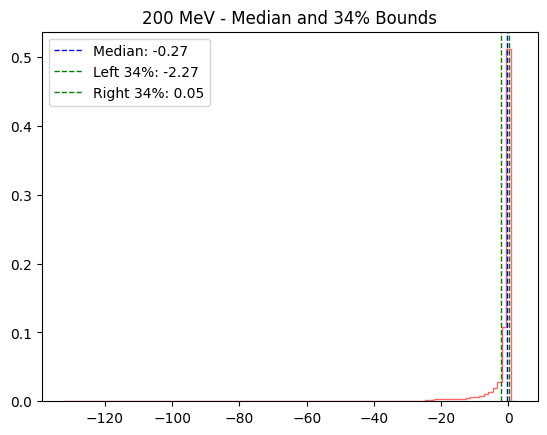

Energy: 250 MeV
Median: 0.16
Left 34% value: -4.20
Right 34% value: 6.21
Difference (Median - Left 34%): 4.36
Difference (Right 34% - Median): 6.05
--------------------------------------------------


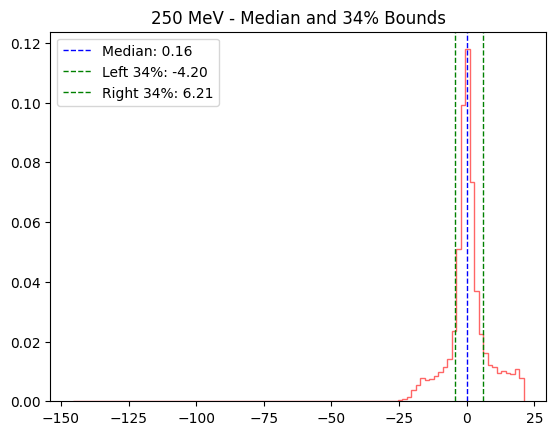

Energy: 300 MeV
Median: -0.23
Left 34% value: -6.29
Right 34% value: 5.51
Difference (Median - Left 34%): 6.06
Difference (Right 34% - Median): 5.73
--------------------------------------------------


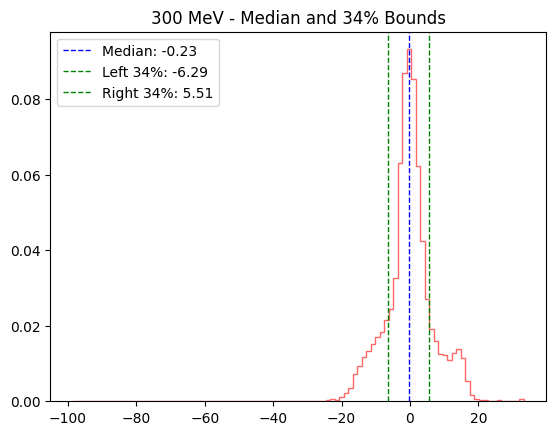

Energy: 350 MeV
Median: -0.31
Left 34% value: -6.69
Right 34% value: 5.26
Difference (Median - Left 34%): 6.38
Difference (Right 34% - Median): 5.57
--------------------------------------------------


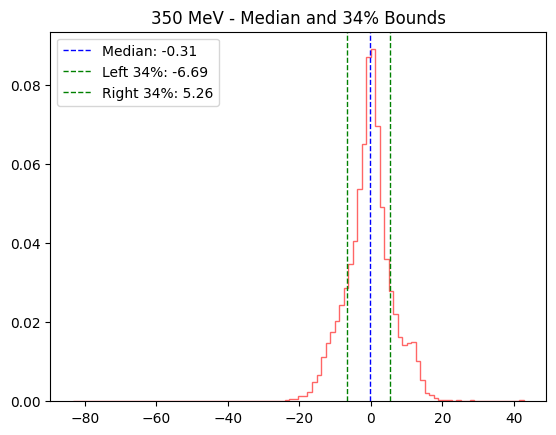

Energy: 400 MeV
Median: -0.56
Left 34% value: -6.44
Right 34% value: 5.08
Difference (Median - Left 34%): 5.88
Difference (Right 34% - Median): 5.64
--------------------------------------------------


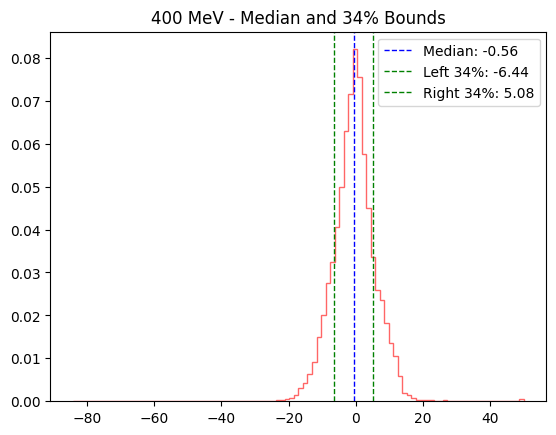

Energy: 450 MeV
Median: -0.51
Left 34% value: -6.11
Right 34% value: 5.10
Difference (Median - Left 34%): 5.60
Difference (Right 34% - Median): 5.61
--------------------------------------------------


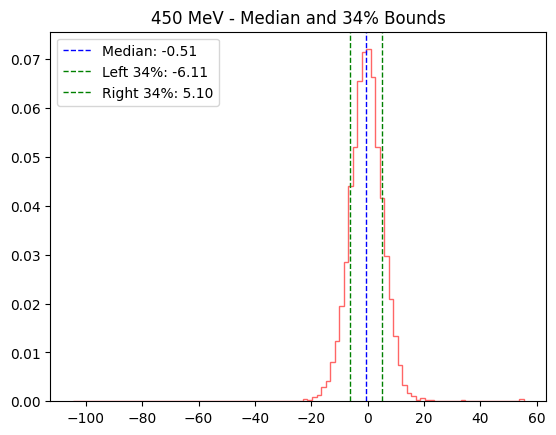

Energy: 500 MeV
Median: -0.56
Left 34% value: -5.95
Right 34% value: 4.76
Difference (Median - Left 34%): 5.39
Difference (Right 34% - Median): 5.32
--------------------------------------------------


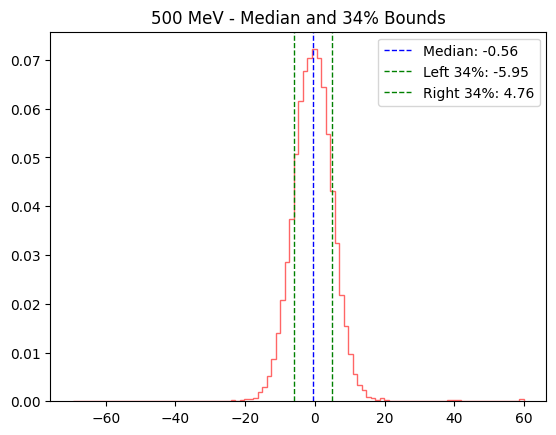

Energy: 550 MeV
Median: -0.47
Left 34% value: -5.58
Right 34% value: 4.52
Difference (Median - Left 34%): 5.11
Difference (Right 34% - Median): 4.98
--------------------------------------------------


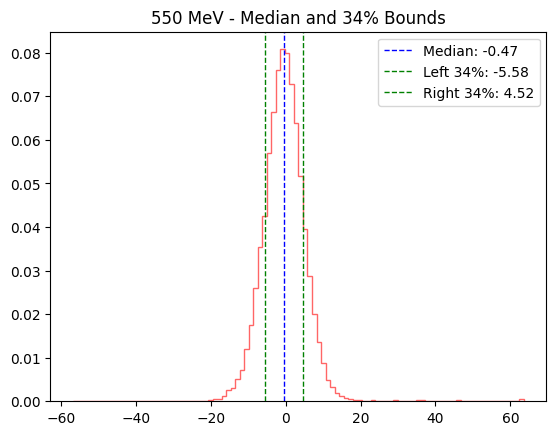

Energy: 600 MeV
Median: -0.42
Left 34% value: -5.32
Right 34% value: 4.51
Difference (Median - Left 34%): 4.90
Difference (Right 34% - Median): 4.92
--------------------------------------------------


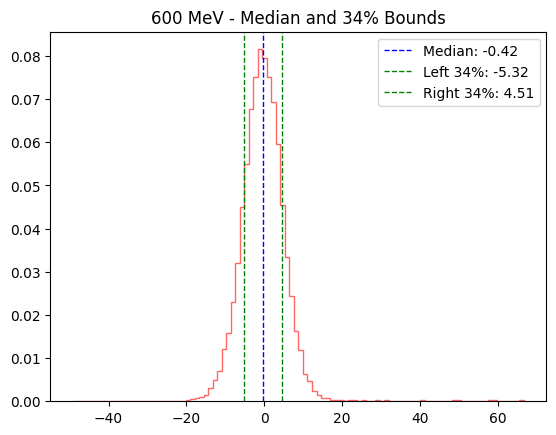

Energy: 650 MeV
Median: -0.51
Left 34% value: -5.17
Right 34% value: 4.13
Difference (Median - Left 34%): 4.66
Difference (Right 34% - Median): 4.63
--------------------------------------------------


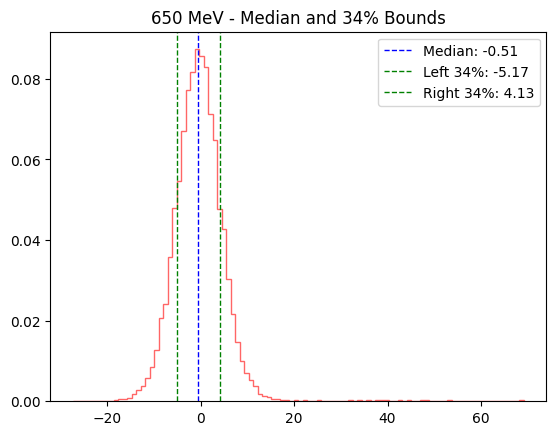

Energy: 700 MeV
Median: -0.38
Left 34% value: -4.81
Right 34% value: 4.09
Difference (Median - Left 34%): 4.43
Difference (Right 34% - Median): 4.47
--------------------------------------------------


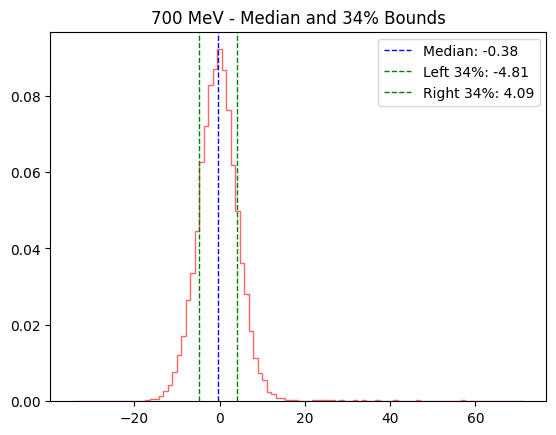

Energy: 750 MeV
Median: -0.31
Left 34% value: -4.56
Right 34% value: 3.92
Difference (Median - Left 34%): 4.25
Difference (Right 34% - Median): 4.23
--------------------------------------------------


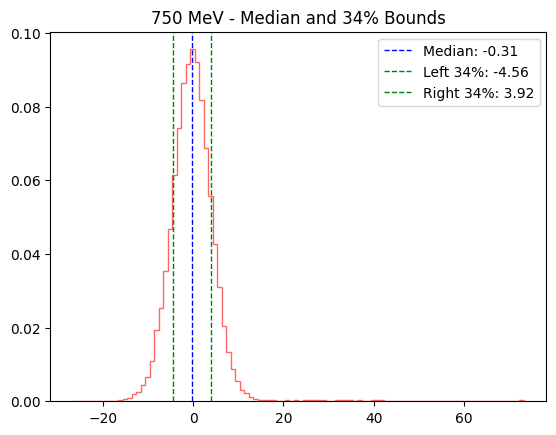

Energy: 800 MeV
Median: -0.19
Left 34% value: -4.31
Right 34% value: 3.90
Difference (Median - Left 34%): 4.12
Difference (Right 34% - Median): 4.08
--------------------------------------------------


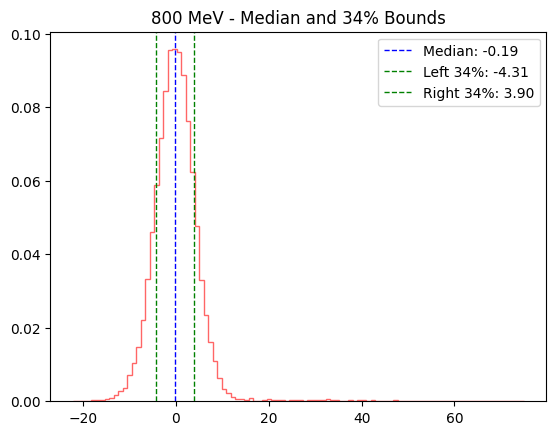

Energy: 850 MeV
Median: -0.06
Left 34% value: -4.13
Right 34% value: 3.95
Difference (Median - Left 34%): 4.07
Difference (Right 34% - Median): 4.01
--------------------------------------------------


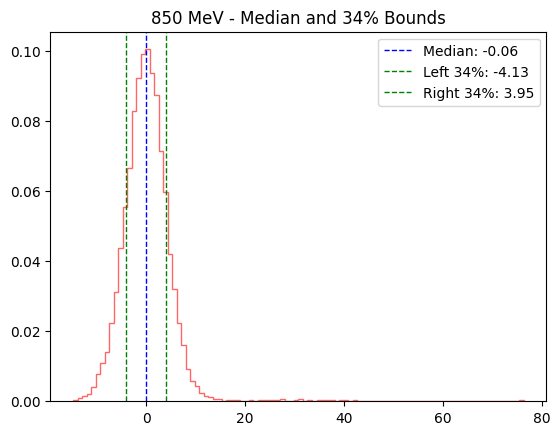

Energy: 900 MeV
Median: -0.07
Left 34% value: -3.97
Right 34% value: 3.86
Difference (Median - Left 34%): 3.90
Difference (Right 34% - Median): 3.93
--------------------------------------------------


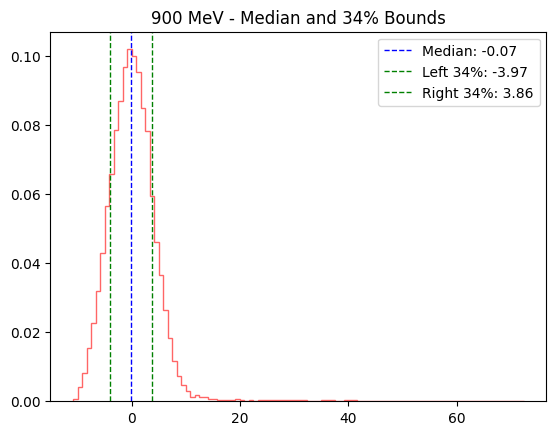

Energy: 950 MeV
Median: 0.03
Left 34% value: -2.68
Right 34% value: 3.78
Difference (Median - Left 34%): 2.72
Difference (Right 34% - Median): 3.74
--------------------------------------------------


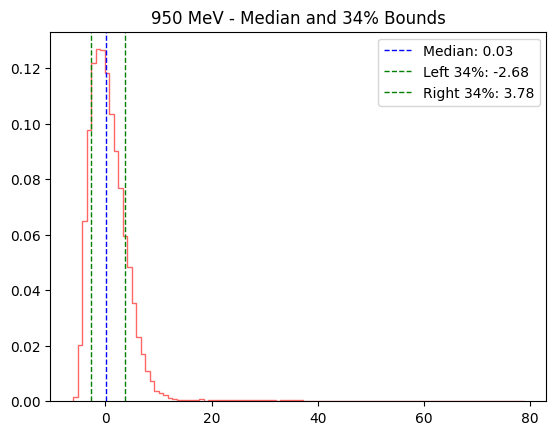

Energy: 1000 MeV
Median: 1.74
Left 34% value: 0.57
Right 34% value: 4.04
Difference (Median - Left 34%): 1.17
Difference (Right 34% - Median): 2.30
--------------------------------------------------


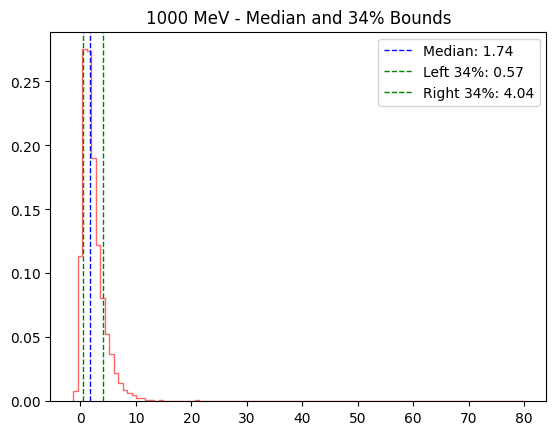

In [178]:
left_34 = []
right_34 = []
median_s = []
energy_s = []

# 예시 범위: 200MeV부터 1000MeV까지 50단위
for energy in range(200, 1050, 50):
    energy_s.append(energy)
    
    # 예: label, pred, fnames는 이미 정의되어 있다고 가정
    #     (fnames == energy)를 만족하는 부분만 추출
    data = 100 * (label[fnames == energy] - pred[fnames == energy]) / label[fnames == energy]
    
    # 혹시라도 data가 2D 형태라면(예: shape=(N,1)) 1D로 변환
    data = data.reshape(-1)  

    # 중앙값(median)
    median = np.median(data)
    median_s.append(median)

    # 데이터 정렬
    sorted_data = np.sort(data)

    # 하위 16%, 84% 인덱스 (16% = median 왼쪽 34%, 84% = median 오른쪽 34%)
    left_idx = int(len(sorted_data) * 0.16)
    right_idx = int(len(sorted_data) * 0.84)

    left_value = sorted_data[left_idx]
    right_value = sorted_data[right_idx]

    # median과의 차이
    diff_median_left = median - left_value
    diff_right_median = right_value - median

    # 결과 출력
    print(f"Energy: {energy} MeV")
    print(f"Median: {median:.2f}")
    print(f"Left 34% value: {left_value:.2f}")
    print(f"Right 34% value: {right_value:.2f}")
    print(f"Difference (Median - Left 34%): {diff_median_left:.2f}")
    print(f"Difference (Right 34% - Median): {diff_right_median:.2f}")
    print("-"*50)

    # 히스토그램
    plt.hist(data, bins=100, density=True, alpha=0.6, color='r', histtype='step')

    # median 및 16%/84% 지점 표시
    plt.axvline(median,      color='b', linestyle='--', linewidth=1, label=f"Median: {median:.2f}")
    plt.axvline(left_value,  color='g', linestyle='--', linewidth=1, label=f"Left 34%: {left_value:.2f}")
    plt.axvline(right_value, color='g', linestyle='--', linewidth=1, label=f"Right 34%: {right_value:.2f}")

    # diff들을 리스트에 기록해둘 수도 있음
    left_34.append(diff_median_left)
    right_34.append(diff_right_median)

    plt.title(f"{energy} MeV - Median and 34% Bounds")
    plt.legend()
    # plt.xlim([-5, 5])
    plt.show()

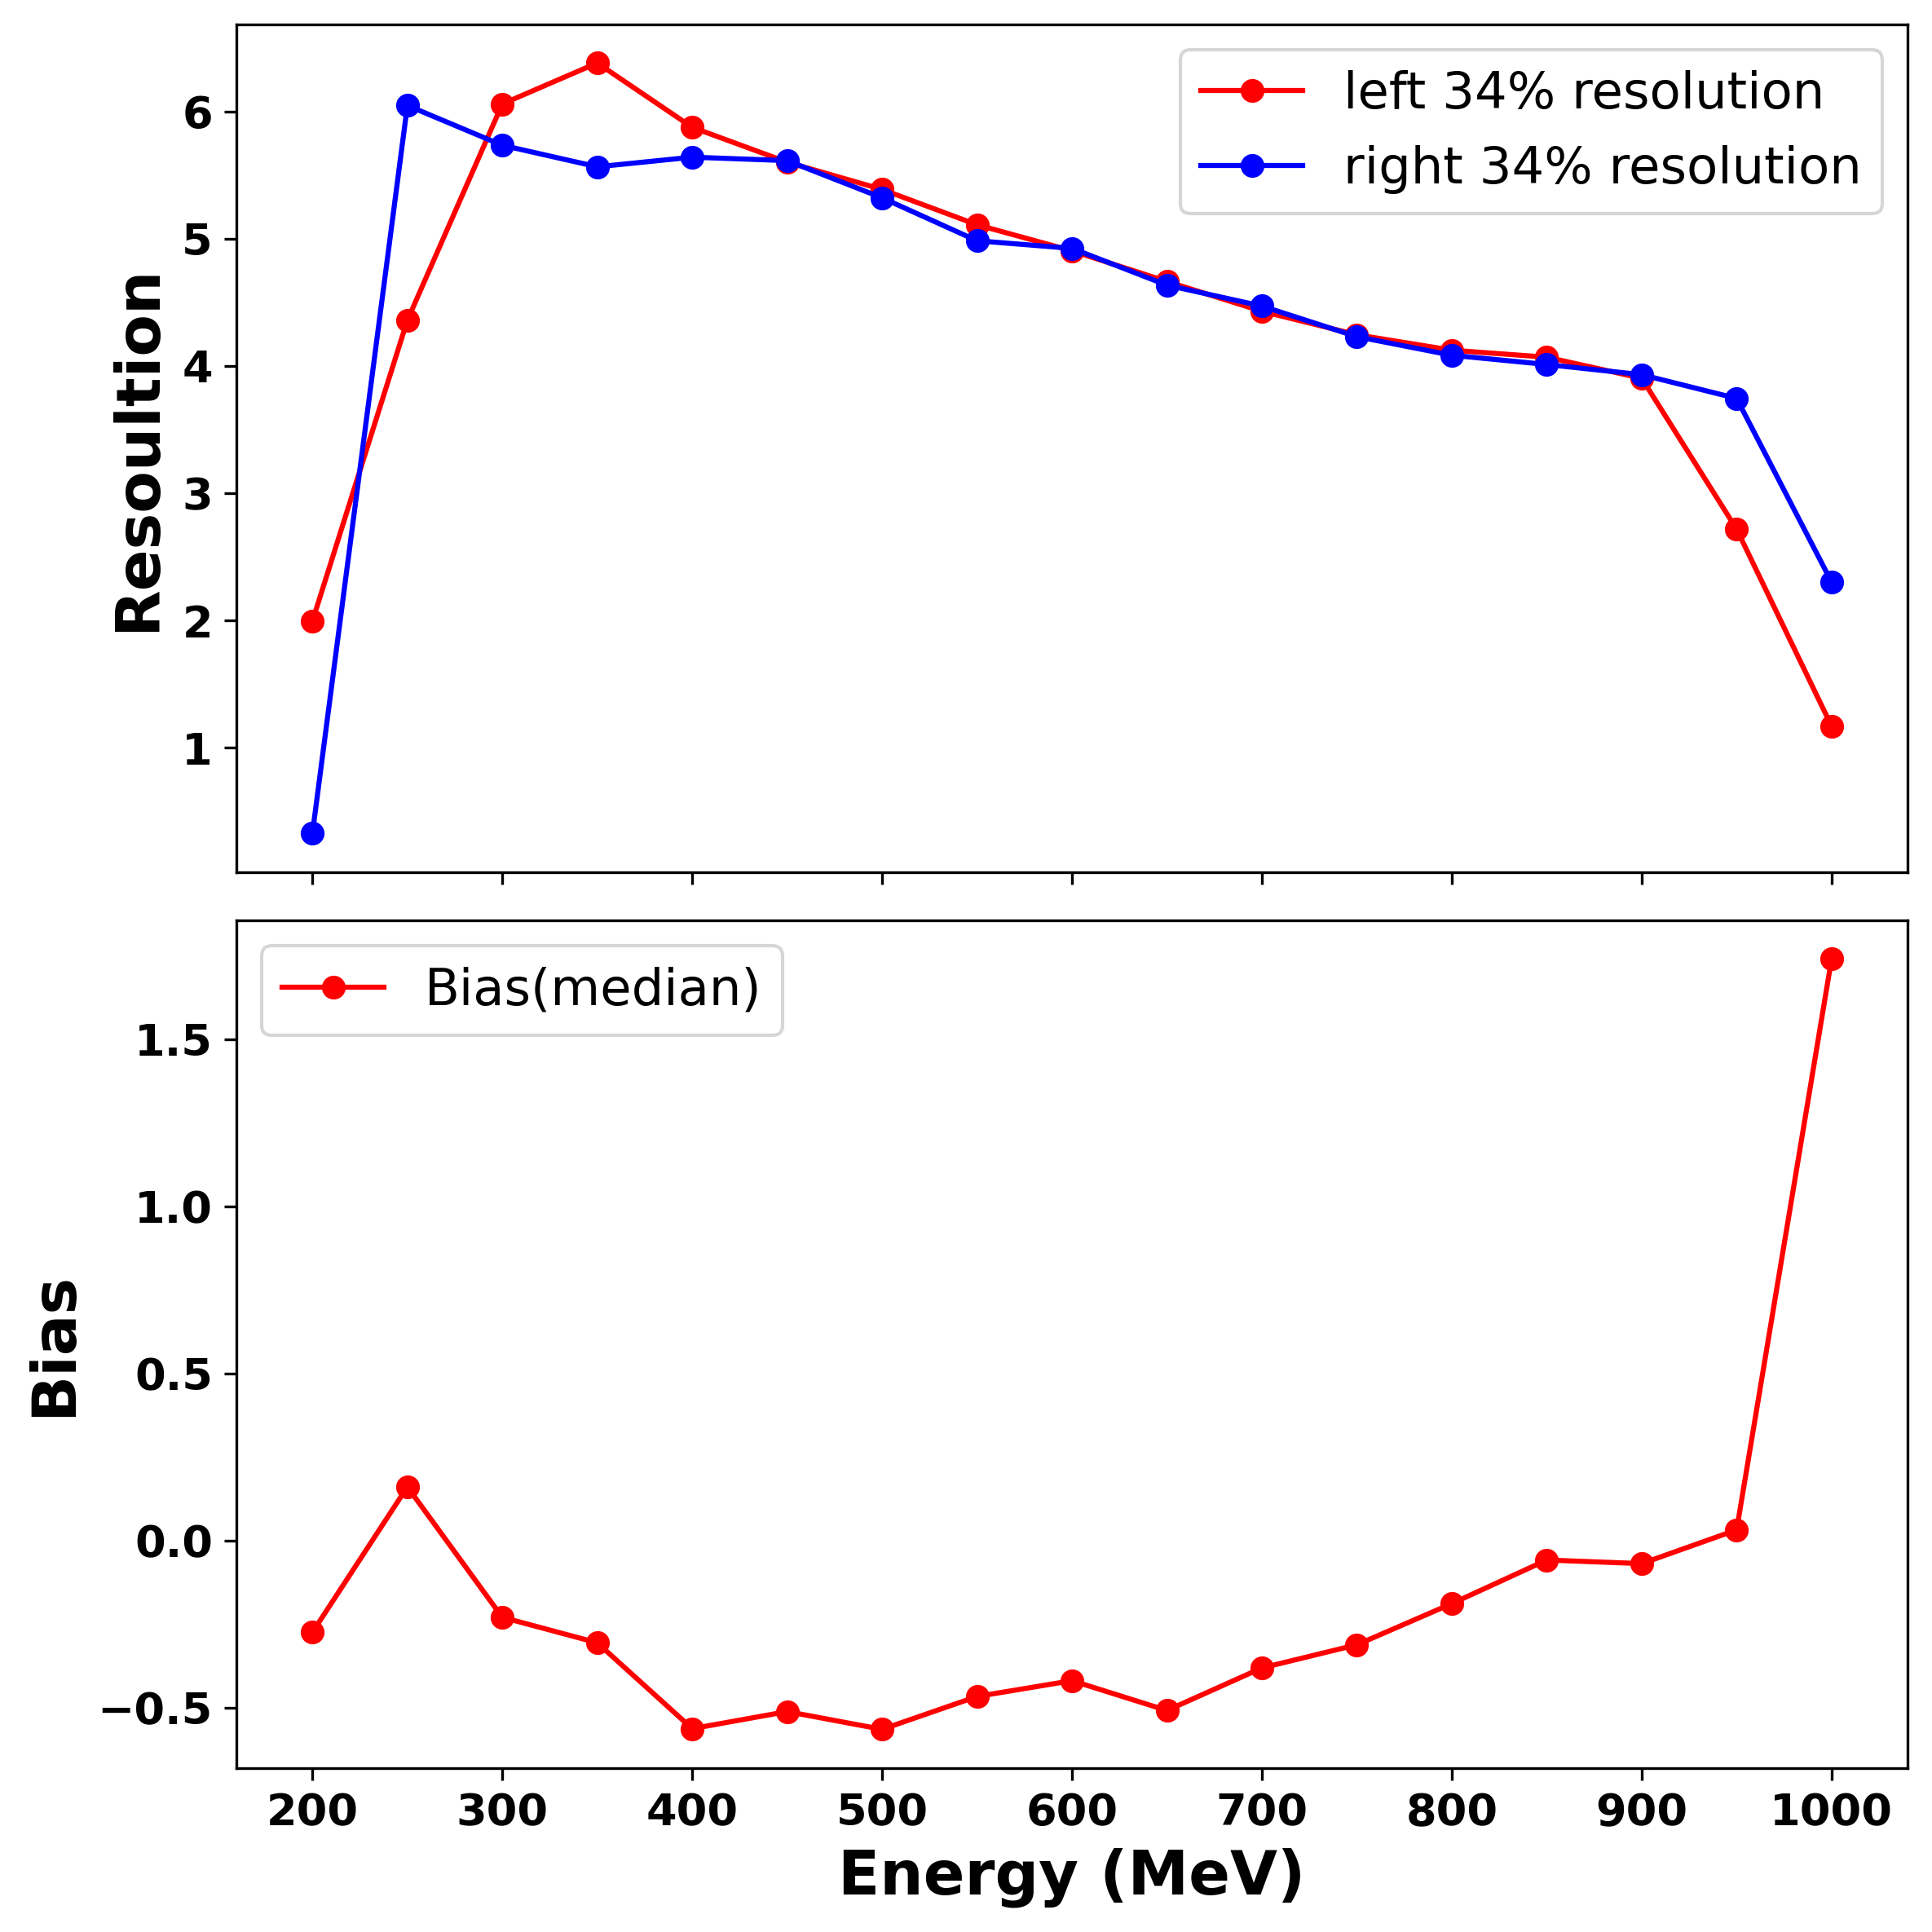

In [179]:
dpi=300


# 서브플롯 생성 (2행 1열의 플롯)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True,dpi=dpi)

# 첫 번째 서브플롯에 left 34%와 right 34% 그림
ax1.plot(energy_s, left_34, marker='o', label='left 34% resolution', color='r')
ax1.plot(energy_s, right_34, marker='o', label='right 34% resolution', color='b')
ax1.set_ylabel('Resoultion',fontsize=18, fontweight='bold')
for label_tick in ax1.get_yticklabels():
    label_tick.set_fontsize(13)
    label_tick.set_fontweight('bold')
# ax1.tick_params(axis='y', labelsize=13, fontweight='bold')
ax1.legend(loc='best',fontsize=15)


# 두 번째 서브플롯에 bias 그림
ax2.plot(energy_s, median_s, marker='o', label='Bias(median)', color='r')
ax2.set_xlabel('Energy (MeV)',fontsize=18, fontweight='bold')
ax2.set_ylabel('Bias',fontsize=18, fontweight='bold')
for label_tick in ax2.get_yticklabels():
    label_tick.set_fontsize(13)
    label_tick.set_fontweight('bold')
for label_tick in ax2.get_xticklabels():
    label_tick.set_fontsize(13)
    label_tick.set_fontweight('bold')
ax2.legend(loc='best',fontsize=15)

# 전체 플롯 간격 조정
plt.tight_layout()
# plt.savefig("energy_res.png", dpi=dpi, bbox_inches="tight")
plt.show()



